In [1]:
#import all relevant modules
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
#read in the correct dataset
df = pd.read_csv("crash_data_one_hot_encoded.csv")
df.head()

,CRASH_YEAR,NUM_LANES,SPD_LIM,TRAFFIC_CTRL_Give Way Sign,TRAFFIC_CTRL_Nil,TRAFFIC_CTRL_Points Man,TRAFFIC_CTRL_School Patrol,TRAFFIC_CTRL_Stop Sign,TRAFFIC_CTRL_Traffic Signal,CRASH_SEV_F,...,STREET_LIGHT_None,STREET_LIGHT_Off,STREET_LIGHT_On,STREET_LIGHT_Unknown,WEATHER_A_Fine,WEATHER_A_Heavy Rain,WEATHER_A_Light Rain,WEATHER_A_Mist,WEATHER_A_Snow,WEATHER_A_Unknown
0,2000,6,50,0,0,0,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,2000,2,100,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,2000,3,100,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
3,2000,2,100,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,2000,2,70,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [3]:
#creates scale for numeric data (0-1)
#df.drop('TRAFFIC_CTRL', axis='columns', inplace=True)
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)
scaled_df
#need to change array to df before i can do this
#scaled_df.to_csv('scaled_crash_data.csv', index=False)


array([[0.        , 0.75      , 0.42857143, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.25      , 0.9047619 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.375     , 0.9047619 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.25      , 0.42857143, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.25      , 0.42857143, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.25      , 0.42857143, ..., 0.        , 0.        ,
        0.        ]])

In [26]:
#find all columns to consider
for col in df.columns: 
    print("'" + col + "'" + ", ") 

'CRASH_YEAR', 
'NUM_LANES', 
'SPD_LIM', 
'CRASH_SEV_CODE', 
'MULTI_VEH_CODE', 
'HOLIDAY_CODE', 
'LG_REGION_DESC_CODE', 
'JUNCTION_TYPE_CODE', 
'DIRN_ROLE1_DESC_CODE', 
'INTSN_MIDBLOCK_CODE', 
'FLAT_HILL_CODE', 
'ROAD_CURVATURE_CODE', 
'ROAD_MARKINGS_CODE', 
'ROAD_SURFACE_CODE', 
'ROAD_WET_CODE', 
'URBAN_CODE', 
'LIGHT_CODE', 
'STREET_LIGHT_CODE', 
'WEATHER_A_CODE', 
'TRAFFIC_CTRL', 


In [10]:
#create KMeans model
kmeans = KMeans(n_clusters=2)
kmeans_scaled = KMeans(n_clusters=4)
y_predicted = kmeans.fit_predict(df)
y_scaled_predicted = kmeans_scaled.fit_predict(scaled_df)
print(y_predicted)
print(y_scaled_predicted)

[0 1 1 ... 0 0 0]
[1 0 3 ... 2 0 0]


In [75]:
#find cluster centres 
#df.drop('CLUSTER', axis='columns', inplace=True)

print(kmeans.cluster_centers_)
print(kmeans_scaled.cluster_centers_)

[[ 2.00903134e+03  2.27895553e+00  9.72100280e+01  1.78103660e+00
   3.67196000e+00  2.87412672e+00  6.37703651e+00  3.78436075e+00
   2.66100141e+00  8.30070141e-01  2.83807496e-01  1.88744184e+00
   7.38841177e-01  9.61364846e-02  9.65226047e-01 -1.19348975e-13
   1.08986319e+00  1.61445404e+00  5.45188546e-01  8.06439038e+00]
 [ 2.00860561e+03  2.38338462e+00  5.08965577e+01  1.82880283e+00
   2.89487943e+00  2.91630196e+00  5.04204082e+00  3.33334060e+00
   2.70013687e+00  4.85517070e-01  1.59017994e-01  2.44436768e+00
   1.21659663e+00  1.27153369e-02  6.79516407e-01  1.00000000e+00
   9.98764210e-01  2.07965720e+00  4.15170787e-01  6.02272807e+00]]
[[ 4.97626112e-01  2.84816552e-01  8.79300213e-01  5.93200582e-01
   4.85132294e-01  7.21514552e-01  4.75395013e-01  6.41419323e-01
   5.31767868e-01  8.58934713e-01  1.72588943e-01  4.28911014e-01
   1.21460844e-01  2.58879801e-02  9.85010067e-01  1.00808251e-13
   4.00898818e-01  4.98733177e-01  3.03254241e-01  5.70338595e-01]
 [ 4.9

In [11]:
#add clusters as a column on dataframe
df['CLUSTER']=y_predicted
df['CLUSTER_SCALED']=y_scaled_predicted
#df.drop('CLUSTER', axis='columns', inplace=True)
#df.drop('CLUSTER_SCALED', axis='columns', inplace=True)
df

,CRASH_YEAR,NUM_LANES,SPD_LIM,TRAFFIC_CTRL_Give Way Sign,TRAFFIC_CTRL_Nil,TRAFFIC_CTRL_Points Man,TRAFFIC_CTRL_School Patrol,TRAFFIC_CTRL_Stop Sign,TRAFFIC_CTRL_Traffic Signal,CRASH_SEV_F,...,STREET_LIGHT_On,STREET_LIGHT_Unknown,WEATHER_A_Fine,WEATHER_A_Heavy Rain,WEATHER_A_Light Rain,WEATHER_A_Mist,WEATHER_A_Snow,WEATHER_A_Unknown,CLUSTER,CLUSTER_SCALED
0,2000,6,50,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,1
1,2000,2,100,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,2000,3,100,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,3
3,2000,2,100,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,2000,2,70,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674806,2018,2,50,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
674807,2018,4,50,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
674808,2018,2,50,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,2
674809,2018,2,50,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [77]:
#export as csv with cluster data
df.to_csv('crash_data_one_hot_encoded_with_clusters.csv', index=False)

In [7]:
#Find the sum of squared error for each number of clusters
sse_scaled = []
sse = []
k_rng = range(1,10)
for k in k_rng:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    kmeans_scaled = KMeans(n_clusters=k)
    kmeans_scaled.fit(scaled_df)
    sse.append(kmeans.inertia_)
    sse_scaled.append(kmeans_scaled.inertia_)
print("finished")

finished


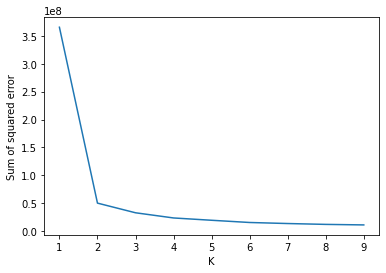

In [8]:
#Plot line graph that shows the sum of squared error for each number of k values
# appropriate number of clusters is at the elbow of the plot, the non-scaled clusters looks like 2
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

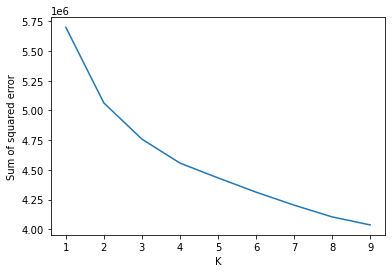

In [9]:
#Plot line graph that shows the sum of squared error for each number of k values
# appropriate number of clusters is at the elbow of the plot, the scaled clusters looks like 4
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse_scaled)